In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df1 = df.rename(columns = {'4.7':"SepalLength",'3.2':"SepalWidth",'1.3':"PetalLength",'0.2':"PetalWidth",'Iris-setosa':"Class"})

In [4]:
df1.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.6,3.4,1.4,0.3,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [5]:
df1.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,147.000000,147.000000,147.000000,147.000000
mean,5.862585,3.050340,3.807483,1.219048
std,0.824971,0.436263,1.748467,0.757278
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df1.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64

<AxesSubplot:>

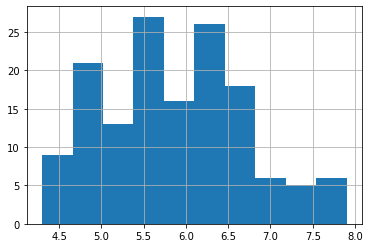

In [7]:
df1['SepalLength'].hist()

Text(0, 0.5, 'Sepal Width')

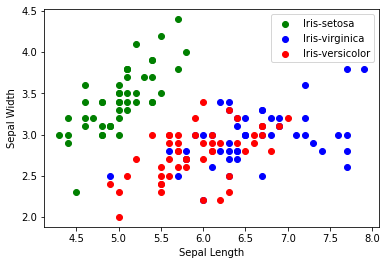

In [9]:
colors = ['green', 'blue' , 'red']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
    x = df1[df1["Class"] == species[i]]
    plt.scatter(x['SepalLength'],x['SepalWidth'], c = colors[i] , label = species[i])
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [10]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df1['Class'] = l.fit_transform(df1['Class'])
df1.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,4.6,3.1,1.5,0.2,0
1,5.0,3.6,1.4,0.2,0
2,5.4,3.9,1.7,0.4,0
3,4.6,3.4,1.4,0.3,0
4,5.0,3.4,1.5,0.2,0


In [11]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns = ['Class'])
Y = df1['Class']
x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size = 0.40)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
model1 = model.score(x_test,y_test)*100
print(f'Accuracy: {model1} %')

Accuracy: 96.61016949152543 %


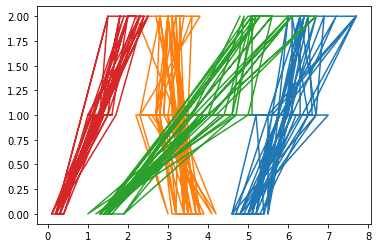

In [14]:
plt.plot(x_test,y_test)